In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras
from keras.datasets import mnist
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set(font_scale=1.5)

Using plaidml.keras.backend backend.


In [2]:
#import os
#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

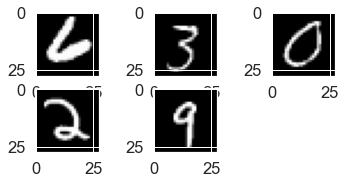

In [5]:
for i in range(331, 336):
    plt.subplot(i)
    random_num = np.random.randint(0,len(X_train))
    plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))

In [6]:
#store in shape that keras needs: nrows, ncols, depth
input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(28, 28, 1)

In [7]:
X_train.shape[0]

60000

In [8]:
#Reshape and Convert to either 0 or 1

num_samples = X_train.shape[0]

X_train = X_train.reshape(len(X_train), input_shape[0], input_shape[1], input_shape[2])
X_test = X_test.reshape(len(X_test), input_shape[0], input_shape[1], input_shape[2])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [9]:
# One hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [10]:
num_classes = len(y_train[0])
num_classes

10

In [11]:
# Create Model
model = Sequential()

model.add(Conv2D(32, 
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64,
                 (3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(.01),
              metrics = ['accuracy'])

model.summary()

INFO:plaidml:Opening device "opencl_amd_gfx900.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [ ]:
batch_size = 64
epochs = 15

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)

print('Test Loss:',score[0], 'Test Accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 22s 372us/step - loss: 0.7468 - acc: 0.7660 - val_loss: 0.2585 - val_acc: 0.9239
Epoch 2/15
60000/60000 [==============================] - 13s 210us/step - loss: 0.3536 - acc: 0.8933 - val_loss: 0.1836 - val_acc: 0.9437
Epoch 3/15
60000/60000 [==============================] - 12s 207us/step - loss: 0.2928 - acc: 0.9116 - val_loss: 0.1553 - val_acc: 0.9544
Epoch 4/15
60000/60000 [==============================] - 12s 204us/step - loss: 0.2591 - acc: 0.9226 - val_loss: 0.1374 - val_acc: 0.9589
Epoch 5/15
60000/60000 [==============================] - 12s 207us/step - loss: 0.2346 - acc: 0.9297 - val_loss: 0.1236 - val_acc: 0.9628
Epoch 6/15
60000/60000 [==============================] - 12s 204us/step - loss: 0.2120 - acc: 0.9359 - val_loss: 0.1120 - val_acc: 0.9650
Epoch 7/15
60000/60000 [==============================] - 12s 206us/step - loss: 0.1953 - acc: 0.9415 - val_loss: 0.

In [ ]:
#Draw loss/accuracy charts over epochs
history_dict = history.history

plt.figure(figsize=(15,10))

plt.subplot(211)

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
   
epochs = range(1,len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, lw=2.0, marker='+', markersize=10.0)
plt.setp(line2, lw=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend();

plt.subplot(212)

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, acc_values , label='Training Loss')
plt.setp(line1, lw=2.0, marker='+', markersize=10.0)
plt.setp(line2, lw=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend();

In [ ]:
model.save('Model\MNIST_cnn_15_epochs.h5')

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Model\model_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
from PIL import Image
img = Image.open('Model\model_plot.png')
img